In [133]:
import numpy as np
import pandas as pd
import tensorflow as tf
from IPython.display import clear_output as cls

# Data
from glob import glob
from tqdm import tqdm
import tensorflow.data as tfd

# Data Visualization
import matplotlib.pyplot as plt

# Model
from tensorflow import keras
from tensorflow.keras import callbacks
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD

### Load data set

In [134]:
import os
RAW_FOLDER  = '/kaggle/input/vn-handwitten/vn_handwitten'
TRAIN_GT = os.path.join(RAW_FOLDER, "train_gt.txt")

In [135]:
TRAIN_GT

'/kaggle/input/vn-handwitten/vn_handwitten/train_gt.txt'

In [136]:
f = open(TRAIN_GT, encoding="utf8")
lines = f.readlines()

In [137]:
f = open(TRAIN_GT, encoding="utf8")
for _ in range(100):
    line = f.readline()
    print(line)

train_img_0.jpg	Thỗn

train_img_1.jpg	May-So

train_img_2.jpg	nhẹn

train_img_3.jpg	hàu

train_img_4.jpg	Quấy

train_img_5.jpg	quầy

train_img_6.jpg	TRẾNH

train_img_7.jpg	Nhờm

train_img_8.jpg	TỌC

train_img_9.jpg	MIỆNG

train_img_10.jpg	LE-VA

train_img_11.jpg	ngứ

train_img_12.jpg	Leninit

train_img_13.jpg	Hydroponic

train_img_14.jpg	TÚY

train_img_15.jpg	phều

train_img_16.jpg	ghiếc

train_img_17.jpg	thâm

train_img_18.jpg	Pai

train_img_19.jpg	DẮT

train_img_20.jpg	chím

train_img_21.jpg	muôi

train_img_22.jpg	A-SIN

train_img_23.jpg	cốt-nhắc

train_img_24.jpg	CARI

train_img_25.jpg	MÚT-XƠ-LIN

train_img_26.jpg	CA-MEN

train_img_27.jpg	KHỆNH

train_img_28.jpg	Xẹp

train_img_29.jpg	vược

train_img_30.jpg	khoát

train_img_31.jpg	LOAI

train_img_32.jpg	SÀNH

train_img_33.jpg	Liến

train_img_34.jpg	Phừn

train_img_35.jpg	LÌU

train_img_36.jpg	NGỚ

train_img_37.jpg	Khẳng

train_img_38.jpg	láng

train_img_39.jpg	Sum

train_img_40.jpg	xi-ren

train_img_41.jpg	RÃ

train_img_42.jpg	phồ

t

In [138]:
train_labels = dict()

for line in lines:
    img, label = line.split()
    train_labels[img] = label

print(train_labels['train_img_1.jpg'])

May-So


In [139]:
RAW_FOLDER

'/kaggle/input/vn-handwitten/vn_handwitten'

In [140]:
filepath = list(train_labels.keys())
labels = list(train_labels.values())
list_of_tuples = list(zip(filepath, labels))

In [176]:
df = pd.DataFrame(list_of_tuples, columns=['filename', 'labels'])
df

,filename,labels
0,train_img_0.jpg,Thỗn
1,train_img_1.jpg,May-So
2,train_img_2.jpg,nhẹn
3,train_img_3.jpg,hàu
4,train_img_4.jpg,Quấy
...,...,...
102995,train_img_102995.jpg,el
102996,train_img_102996.jpg,nq
102997,train_img_102997.jpg,QĐ
102998,train_img_102998.jpg,Logarithm


In [142]:
train_image_dir = '/kaggle/input/vn-handwitten/vn_handwitten/new_train'
df['filename'] = [train_image_dir + f"/{filename}" for filename in df['filename']]
df

,filename,labels
0,/kaggle/input/vn-handwitten/vn_handwitten/new_...,Thỗn
1,/kaggle/input/vn-handwitten/vn_handwitten/new_...,May-So
2,/kaggle/input/vn-handwitten/vn_handwitten/new_...,nhẹn
3,/kaggle/input/vn-handwitten/vn_handwitten/new_...,hàu
4,/kaggle/input/vn-handwitten/vn_handwitten/new_...,Quấy
...,...,...
102995,/kaggle/input/vn-handwitten/vn_handwitten/new_...,el
102996,/kaggle/input/vn-handwitten/vn_handwitten/new_...,nq
102997,/kaggle/input/vn-handwitten/vn_handwitten/new_...,QĐ
102998,/kaggle/input/vn-handwitten/vn_handwitten/new_...,Logarithm


### Find all characters in labels

In [143]:
unique_chars = set(char for word in df['labels'] for char in word)
n_classes = len(unique_chars)

# Show
print(f"Total number of unique characters : {n_classes}")
print(f"Unique Characters : \n{unique_chars}")

Total number of unique characters : 187
Unique Characters : 
{'ả', 'Ữ', 'ẳ', 'Ú', 'ỹ', 'ă', 'Ó', 'Â', 'ở', 'b', 'u', 'ệ', 'ó', 'Ô', 'é', 'â', 'Ố', 'ư', 'Ư', 'Ỵ', 'ô', 'D', 'Ă', 'ậ', 'Ỏ', 'Ỗ', 'Ở', 'Ừ', 'o', 'ổ', 'J', 'z', 'W', 'Ỡ', 'Ỳ', 'ặ', 'ỗ', 'a', 'À', 'r', 'p', 'ỏ', 'ử', 'Ỷ', 'Ỹ', 'ằ', 'ẩ', 'Ê', 'ấ', 'q', 'k', 'w', 'Í', 'Ề', 'ể', 'Q', 'Ẩ', 'Ử', 'ỉ', 'L', 'Ằ', 'h', 'Z', 'Ờ', 'È', 'M', 'Õ', 'Ụ', 'ơ', 'ã', 'Ọ', 'Ự', 'K', 'Ị', 'ụ', 'm', 'Á', 'A', 'Ý', 'ý', 't', 'Ệ', 'x', 'õ', 'ú', 'ẹ', 'Đ', 'ố', 'à', 'H', 'ứ', 'ự', 'Ắ', 'ẽ', 'ĩ', 'Ủ', 'ợ', 'è', 'Ẵ', 'Ầ', 'c', 'Ẻ', '-', 'ỷ', 'Ồ', 'd', 'v', 'Ế', 'ủ', 'U', 'Ơ', 'X', 'ỡ', 'n', 'Ấ', 'ớ', 'í', 'ọ', 'ũ', 'ắ', 'Ứ', 'i', 'ù', 'Ù', 'Ạ', 'Ĩ', 'l', 's', 'Ũ', 'Ễ', 'ò', 'e', 'ẵ', 'F', 'ẫ', 'Ặ', 'N', 'I', 'ầ', 'ạ', 'Ợ', 'đ', 'ộ', 'S', 'Y', 'Ã', 'Ể', 'B', 'ị', 'Ì', 'V', 'á', 'T', 'ừ', 'Ả', 'j', 'Ẫ', 'Ẽ', 'y', 'Ỉ', 'ê', 'ế', 'g', 'R', 'Ậ', 'Ẳ', 'ữ', 'C', 'f', 'ỵ', 'ẻ', 'Ớ', 'E', 'ỳ', 'G', 'Ẹ', 'Ổ', 'P', 'Ộ', 'ề', 'É', 'O', 'ờ', 'ồ', 'ễ', 'Ò', 'ì'}


In [144]:
MAX_LABEL_LENGTH = max(map(len, df['labels']))
print(f"Maximum length of a label : {MAX_LABEL_LENGTH}")

Maximum length of a label : 17


In [145]:
IMG_WIDTH = 128
IMG_HEIGHT = 50
IMAGE_SIZE = (IMG_WIDTH, IMG_HEIGHT)

In [146]:
def load_image(image_path : str):
    '''
    This function loads and preprocesses images. It first receives the image path, which is used to
    decode the image as a JPEG using TensorFlow. Then, it converts the image to a tensor and applies
    two processing functions: resizing and normalization. The processed image is then returned by
    the function.

    Argument :
        image_path : The path of the image file to be loaded.

    Return:
        image : The loaded image as a tensor.
    '''

    # Read the Image
    image = tf.io.read_file(image_path)

    # Decode the image
    decoded_image = tf.image.decode_jpeg(contents = image, channels = 1)

    # Convert image data type.
    cnvt_image = tf.image.convert_image_dtype(image = decoded_image, dtype = tf.float32)

    # Resize the image
    resized_image = tf.image.resize(images = cnvt_image, size = (IMG_HEIGHT, IMG_WIDTH))

    # Transpose
    image = tf.transpose(resized_image, perm = [1, 0, 2])

    # Convert image to a tensor.
    image = tf.cast(image, dtype = tf.float32)

    # Return loaded image
    return image

In [147]:
def encode_single_sample(image_path : str, label : str):

    '''
    The function takes an image path and label as input and returns a dictionary containing the processed image tensor and the label tensor.
    First, it loads the image using the load_image function, which decodes and resizes the image to a specific size. Then it converts the given
    label string into a sequence of Unicode characters using the unicode_split function. Next, it uses the char_to_num layer to convert each
    character in the label to a numerical representation. It pads the numerical representation with a special class (n_classes)
    to ensure that all labels have the same length (MAX_LABEL_LENGTH). Finally, it returns a dictionary containing the processed image tensor
    and the label tensor.

    Arguments :
        image_path : The location of the image file.
        label      : The text to present in the image.

    Returns:
        dict : A dictionary containing the processed image and label.
    '''

    # Get the image
    image = load_image(image_path)

    # Convert the label into characters
    chars = tf.strings.unicode_split(label, input_encoding='UTF-8')

    # Convert the characters into vectors
    vecs = char_to_num(chars)

    # Pad label
    pad_size = MAX_LABEL_LENGTH - tf.shape(vecs)[0]
    vecs = tf.pad(vecs, paddings = [[0, pad_size]], constant_values=n_classes+1)

    return {'image':image, 'label':vecs}

In [148]:
from sklearn.model_selection import train_test_split
test_size = 0.4
train_csv,valid_csv = train_test_split(df, test_size=test_size, random_state=42)

test_x,test_y = train_test_split(valid_csv, test_size=0.5, random_state=42)


In [150]:
import tensorflow.data as tfd
AUTOTUNE = tfd.AUTOTUNE
BATCH_SIZE = 128

In [151]:
# Character to numeric value dictionary
char_to_num = layers.StringLookup(
    vocabulary = list(unique_chars),
    mask_token = None
)

# Reverse dictionary
num_to_char = layers.StringLookup(
    vocabulary = char_to_num.get_vocabulary(),
    mask_token = None,
    invert = True
)

In [152]:
train_ds = tf.data.Dataset.from_tensor_slices(
    (np.array(train_csv['filename'].to_list()), np.array(train_csv['labels'].to_list()))
).shuffle(1000).map(encode_single_sample, num_parallel_calls=AUTOTUNE).batch(BATCH_SIZE).prefetch(AUTOTUNE)

# Validation data
valid_ds = tf.data.Dataset.from_tensor_slices(
    (np.array(valid_csv['filename'].to_list()), np.array(valid_csv['labels'].to_list()))
).map(encode_single_sample, num_parallel_calls=AUTOTUNE).batch(BATCH_SIZE).prefetch(AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices(
    (np.array(test_x['filename'].to_list()), np.array(test_x['labels'].to_list()))
).map(encode_single_sample, num_parallel_calls=AUTOTUNE).batch(BATCH_SIZE).prefetch(AUTOTUNE)


In [153]:
print(f"Training Data Size   : {tf.data.Dataset.cardinality(train_ds).numpy() * BATCH_SIZE}")
#print(f"Validation Data Size : {tf.data.Dataset.cardinality(valid_ds).numpy() * BATCH_SIZE}")
print(f"Validation Data Size    : {tf.data.Dataset.cardinality(valid_ds).numpy() * BATCH_SIZE}")
print(f"Testing Data Size    : {tf.data.Dataset.cardinality(test_ds).numpy() * BATCH_SIZE}")

Training Data Size   : 61824
Validation Data Size    : 41216
Testing Data Size    : 20608


In [154]:
def show_images(data, GRID=[3, 3], FIGSIZE=(25, 6), cmap='binary_r', model=None, decode_pred=None):
    # Plotting configurations
    plt.figure(figsize=FIGSIZE)
    n_rows, n_cols = GRID

    # Loading Data
    data = next(iter(data))
    images, labels = data['image'], data['label']

    # Ensure you have exactly n_rows * n_cols images to display
    num_images = n_rows * n_cols
    if len(images) < num_images:
        raise ValueError(f"Data contains only {len(images)} images, but {num_images} are required for the specified GRID.")

    # Iterate over the data
    for index, (image, label) in enumerate(zip(images[:num_images], labels[:num_images])):

        # Label processing
        text_label = num_to_char(label)
        text_label = tf.strings.reduce_join(text_label).numpy().decode('UTF-8')
        text_label = text_label.replace("[UNK]", " ").strip()

        # Create a sub plot
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(tf.transpose(image, perm=[1, 0, 2]), cmap=cmap)
        plt.axis('off')

        if model is not None and decode_pred is not None:
            # Make prediction
            pred = model.predict(tf.expand_dims(image, axis=0))
            pred = decode_pred(pred)[0]
            title = f"True : {text_label}\nPred : {pred}"
            plt.title(title)
        else:
            # add title
            plt.title(text_label)

    plt.show()



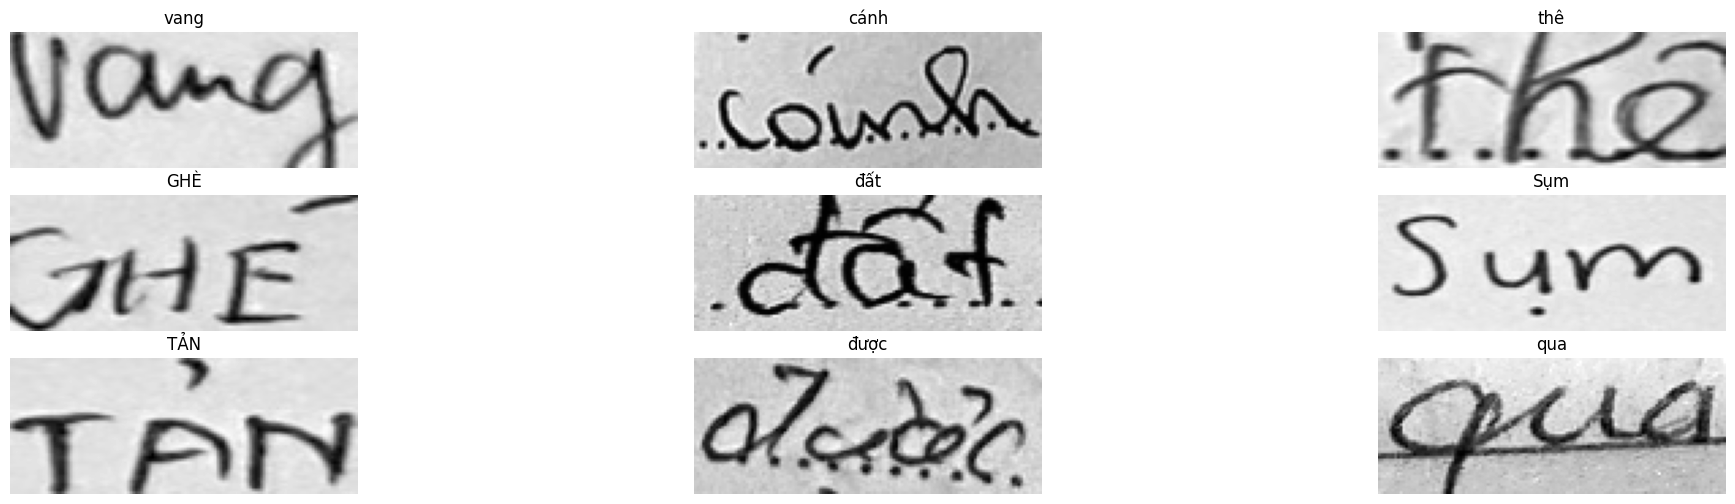

In [155]:
show_images(data=test_ds, cmap='gray')

In [156]:
class CTCLayer(layers.Layer):

    def __init__(self, **kwargs) -> None:
        super().__init__(**kwargs)

        self.loss_fn = keras.backend.ctc_batch_cost

    def call(self, y_true, y_pred):

        batch_len = tf.cast(tf.shape(y_true)[0], dtype='int64')

        input_len = tf.cast(tf.shape(y_pred)[1], dtype='int64') * tf.ones(shape=(batch_len, 1), dtype='int64')
        label_len = tf.cast(tf.shape(y_true)[1], dtype='int64') * tf.ones(shape=(batch_len, 1), dtype='int64')

        loss = self.loss_fn(y_true, y_pred, input_len, label_len)

        self.add_loss(loss)

        return y_pred

In [ ]:
from tensorflow.keras.layers import Dense, LSTM, Reshape, BatchNormalization, Input, Conv2D, MaxPool2D, Lambda, Bidirectional, Add, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.activations import relu, sigmoid, softmax
import tensorflow.keras.backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import CSVLogger, TensorBoard, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


In [158]:
input_images = layers.Input(shape=(IMG_WIDTH, IMG_HEIGHT, 1), name="image")

# Labels : These are added for the training purpose.
target_labels = layers.Input(shape=(None, ), name="label")

# CNN Network
x = layers.Conv2D(
    filters=32, 
    kernel_size=3,
    strides=1,
    padding='same',
    activation='relu',
    kernel_initializer='he_normal'
)(input_images)

x = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

x = layers.Conv2D(
    filters=64, 
    kernel_size=3, 
    strides=1,
    padding='same',
    activation='relu',
    kernel_initializer='he_normal'
)(x)

x = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)


# Encoding Space
encoding = layers.Reshape(target_shape=((IMG_WIDTH//4), (IMG_HEIGHT//4)*64))(x)
encoding = layers.Dense(64, activation='relu', kernel_initializer='he_normal')(encoding)
encoding = layers.Dropout(0.2)(encoding)

# RNN Network
x = layers.Bidirectional(layers.LSTM(128, return_sequences=True, dropout=0.25))(encoding)
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True, dropout=0.25))(x)

# Output Layer
output = layers.Dense(len(char_to_num.get_vocabulary())+1, activation='softmax')(x)

# CTC Layer
ctc_layer = CTCLayer()(target_labels, output)

# Model 
ocr_model = keras.Model(
    inputs=[input_images, target_labels],
    outputs=[ctc_layer]
)

In [159]:
ocr_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 image (InputLayer)             [(None, 128, 50, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_10 (Conv2D)             (None, 128, 50, 32)  320         ['image[0][0]']                  
                                                                                                  
 max_pooling2d_8 (MaxPooling2D)  (None, 64, 25, 32)  0           ['conv2d_10[0][0]']              
                                                                                                  
 conv2d_11 (Conv2D)             (None, 64, 25, 64)   18496       ['max_pooling2d_8[0][0]']  

In [160]:
from tensorflow.keras import callbacks
MODEL_NAME = 'Handwritten-OCR'

CALLBACKS = [
    callbacks.EarlyStopping(patience=10, restore_best_weights=True),
    callbacks.ModelCheckpoint(filepath=MODEL_NAME + ".h5", save_best_only=True)
]

In [162]:
ocr_model.compile(optimizer='adam')

# Train
history = ocr_model.fit(
    train_ds,
    validation_data=valid_ds,
    epochs = 50,
    verbose = 1,callbacks=CALLBACKS
)

Epoch 1/50
483/483 [==============================] - 185s 362ms/step - loss: 19.3448 - val_loss: 17.4589
Epoch 2/50
483/483 [==============================] - 124s 257ms/step - loss: 16.4641 - val_loss: 15.2550
Epoch 3/50
483/483 [==============================] - 126s 260ms/step - loss: 14.3831 - val_loss: 13.2734
Epoch 4/50
483/483 [==============================] - 124s 257ms/step - loss: 12.5906 - val_loss: 11.6548
Epoch 5/50
483/483 [==============================] - 125s 259ms/step - loss: 10.8872 - val_loss: 9.6145
Epoch 6/50
483/483 [==============================] - 125s 258ms/step - loss: 9.5583 - val_loss: 8.4438
Epoch 7/50
483/483 [==============================] - 126s 261ms/step - loss: 8.5025 - val_loss: 7.2996
Epoch 8/50
483/483 [==============================] - 130s 269ms/step - loss: 7.5776 - val_loss: 6.5817
Epoch 9/50
483/483 [==============================] - 124s 258ms/step - loss: 6.7452 - val_loss: 5.7558
Epoch 10/50
483/483 [==============================] - 

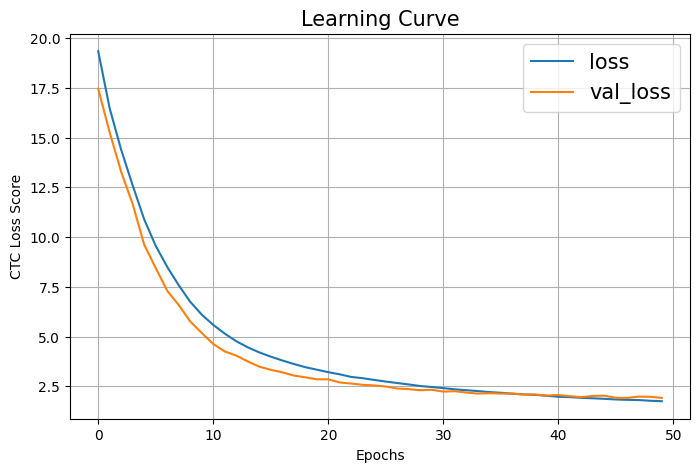

In [163]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.legend(fontsize=15)
plt.xlabel("Epochs")
plt.ylabel("CTC Loss Score")
plt.title("Learning Curve", fontsize=15)
plt.grid()
plt.savefig("OCRModel-LearningCurve.png")
plt.show()

In [165]:
inference_model = keras.Model(
    inputs=ocr_model.get_layer(name="image").input,
    outputs=ocr_model.get_layer(name='dense_9').output
)

# Model summary
inference_model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image (InputLayer)          [(None, 128, 50, 1)]      0         
                                                                 
 conv2d_10 (Conv2D)          (None, 128, 50, 32)       320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 64, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 64, 25, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 32, 12, 64)       0         
 2D)                                                             
                                                                 
 reshape_4 (Reshape)         (None, 32, 768)           0   

In [166]:
def decode_pred(pred_label):

    '''
    The decode_pred function is used to decode the predicted labels generated by the OCR model.
    It takes a matrix of predicted labels as input, where each time step represents the probability
    for each character. The function uses CTC decoding to decode the numeric labels back into their
    character values. The function also removes any unknown tokens and returns the decoded texts as a
    list of strings. The function utilizes the num_to_char function to map numeric values back to their
    corresponding characters. Overall, the function is an essential step in the OCR process, as it allows
    us to obtain the final text output from the model's predictions.

    Argument :
        pred_label : These are the model predictions which are needed to be decoded.

    Return:
        filtered_text : This is the list of all the decoded and processed predictions.

    '''

    # Input length
    input_len = np.ones(shape=pred_label.shape[0]) * pred_label.shape[1]

    # CTC decode
    decode = keras.backend.ctc_decode(pred_label, input_length=input_len, greedy=True)[0][0][:,:MAX_LABEL_LENGTH]

    # Converting numerics back to their character values
    chars = num_to_char(decode)

    # Join all the characters
    texts = [tf.strings.reduce_join(inputs=char).numpy().decode('UTF-8') for char in chars]

    # Remove the unknown token
    filtered_texts = [text.replace('[UNK]', " ").strip() for text in texts]

    return filtered_texts

In [168]:
print(decode_pred(inference_model.predict(test_ds)))

161/161 [==============================] - 16s 101ms/step
['vang', 'cánh', 'Thê', 'GHÉ', 'đất', 'Sụm', 'TẢN', 'được', 'qua', 'đơi', 'SOS', 'Luộm', 'ĐỌA', 'cán', 'bình', 'KÊU', 'CHỤCP', 'choo', 'đình', 'Torom', 'tích', 'cuo', 'hae', 'TUỒN', 'giái', 'Ảm', 'dũng', 'tâm', 'lực', 'lành', 'thơ', 'Ralum', 'PHÀM', 'chỏn', 'Phế', 'XỔN', 'am', 'đóm', 'đa', 'Noel', 'thân', 'ÙA', 'ƠM', 'Vo', 'MÀY', 'VÕNG', 'phát', 'PÒ', 'THUN', 'cong', 'KHÓT', 'trương', 'đâu', 'SONATA', 'CỘC', 'đao', 'Đảng', 'ở', 'Thục', 'ran', 'RƯỢNG', 'bo', 'lập', 'Bênh', 'đôi', 'Mô-nô', 'TI', 'thiệt', 'ĐỊT', 'cây', 'TRẢNG', 'ETHER', 'Bái', 'nhấn', 'Dượt', 'Phu', 'chưng', 'Ngốn', 'RYN', 'ả', 'hoàn', 'ASPIRIN', 'chất', 'phải', 'lai', 'Hám', 'Cu', 'mơi', 'phong', 'đất', 'hoa', 'Phẩm', 'PHCLA', 'Mbit', 'Pho-Mốt', 'Gập', 'thiên', 'GIẾM', 'Đôi', 'Vi-Rét', 'kháng', 'ngân', 'PHIẾU', 'TXPO', 'mênh', 'HẠP', 'chất', 'KHÈ', 'quan', 'thao', 'TEAN', 'Lần', 'hoảng', 'XÀO', 'tiếp', 'oàm', 'Bổng', 'Thộn', 'lai', 'là', 'contimum', 'nơi', 'ĐỌN', 

1/1 [==============================] - 0s 21ms/step


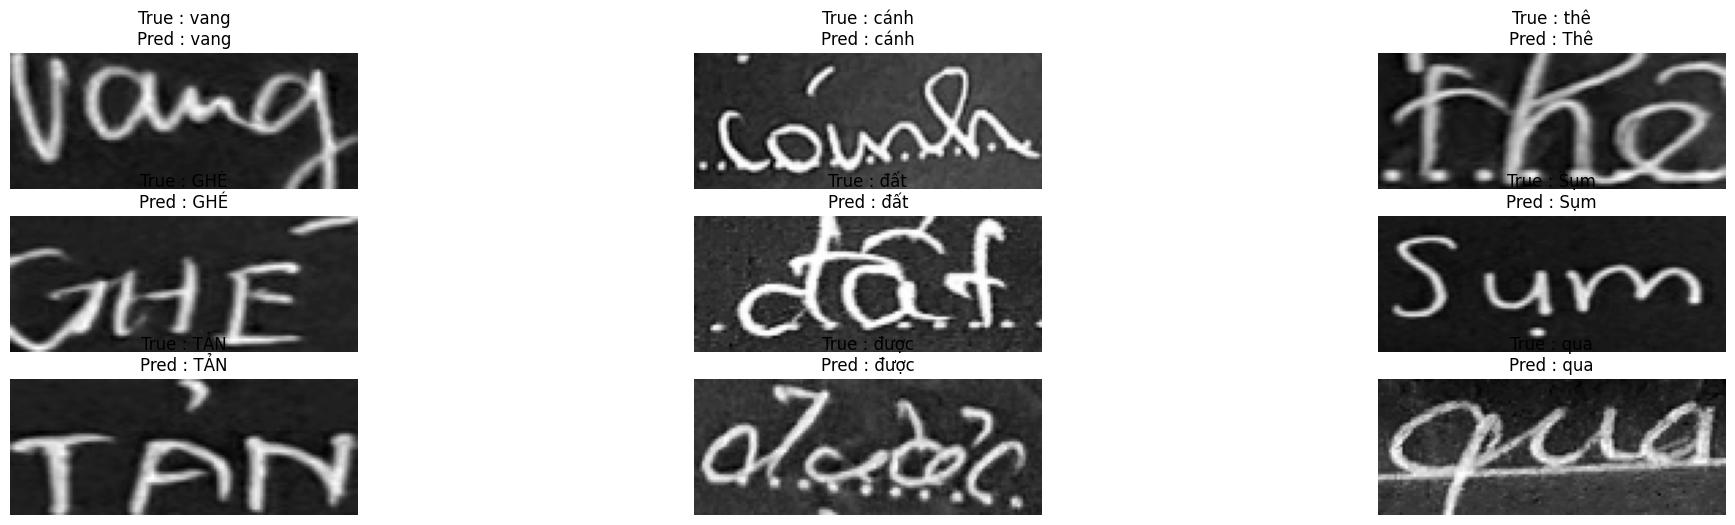

In [169]:
show_images(data=test_ds, model=inference_model, decode_pred=decode_pred, cmap='binary')

In [174]:
from datasets import load_dataset, load_metric
cer_metric = load_metric("cer")

def compute_metrics(pred):
    label_ids = pred.label_ids
    pred_ids = pred.predictions
    
    pred_str = processor.batch_decode(pred_ids, skip_special_tokens=True)
    label_ids[label_ids == -100] = processor.tokenizer.pad_token_id
    label_str = processor.batch_decode(label_ids, skip_special_tokens=True)
    
    cer = cer_metric.compute(predictions=pred_str, references=label_str)
    
    return {"cer" : cer}

ImportError: To be able to use cer, you need to install the following dependencies['jiwer', 'jiwer'] using 'pip install jiwer jiwer' for instance'

In [ ]:
test_image_dir 

In [ ]:
df['filename']  = [test_image_dir + f"/{filename}" for filename in df['filename']]

In [ ]:
#show_images(data=valid_ds, model=inference_model, decode_pred=decode_pred, cmap='binary')